In [1]:
# imports 
import emp_preprocessing as ep
import emp_fake_data as ef
import emp_metrics as em
import emp_graphics as eg
import networkx as nx
import graphics as gx
import functions as fct
import numpy as np
import pandas as pd
import parameters as par

# parameters
agg_periods = [1, 50, 100, 250]
path_results = "./results/empirical_results/"

# 1 data preprocessing

In [2]:
# load fake data (mmsr)
df_mmsr = ef.get_df_mmsr(lines=int(1e4))
dic_obs_matrix_reverse_repo = ep.build_from_mmsr(df_mmsr=df_mmsr)

100%|██████████| 10000/10000 [00:08<00:00, 1212.59it/s]


In [2]:
# load fake data (exposure)
df_exposures = ef.get_df_exposures(lines=int(1e5))
dic_obs_matrix_reverse_repo = ep.build_from_exposures(df_exposures=df_exposures)

100%|██████████| 100000/100000 [00:23<00:00, 4273.32it/s]


In [ ]:
# load real data 
df_exposures = pd.read_stata("to be filled")
dic_obs_matrix_reverse_repo = ep.build_from_exposures(df_exposures=df_exposures)

In [2]:
# load dic directly (faster)
dic_obs_matrix_reverse_repo = ep.get_dic_obs_matrix_reverse_repo()

# 2 metrics measurement

In [4]:
# get aggregated adjency matrices
dic_binary_adjs = em.get_binary_adjs(dic_obs_matrix_reverse_repo, agg_periods)

/opt/tmp/tmp/ipykernel_16523/2502162530.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  test = pd.Series()


<AxesSubplot: >

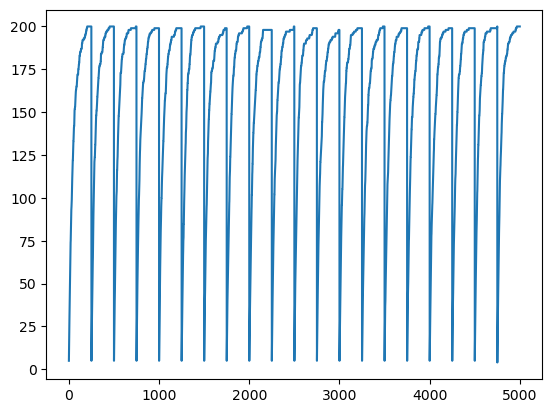

In [24]:
test = pd.Series()
for i in range(5000):
    test.loc[i] = (dic_binary_adjs[250][i].sum())
test.plot()

## 2.1 jaccard

In [8]:
# get jaccard
df_jaccard = em.get_jaccard(dic_binary_adjs)
eg.plot_jaccard_aggregated(df_jaccard, path_results)

## 2.2 density

In [9]:
# get density
df_density = em.get_density(dic_binary_adjs)
eg.plot_network_density(df_density, path_results)

## 2.3 distribution of in and out degree

In [2]:
# for the exposures
dic_obs_matrix_reverse_repo = ep.get_dic_obs_matrix_reverse_repo()
dic_binary_adjs = em.get_binary_adjs(dic_obs_matrix_reverse_repo, agg_periods)
dic_in_degree, dic_out_degree = em.get_degree_distribution(dic_binary_adjs)
eg.plot_degree_distribution(dic_in_degree,
    dic_out_degree,
    f"{path_results}degree_distribution/",
    name="degree_distribution_reverse_repos",
    save_every=1000)


## 2.4 core periphery

In [4]:
# load dic directly (faster)
dic_obs_matrix_reverse_repo = ep.get_dic_obs_matrix_reverse_repo()
for algo in par.cp_algos:
    eg.get_n_plot_cp_test(dic_obs_matrix_reverse_repo, algo=algo,save_every=1000, path_results=f"{path_results}core-periphery/{algo}/")

/mnt/live/user/vlecoz/Secured_interbank_network/emp_graphics.py:130: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_pvalue = pd.Series()
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/cpnet/qstest.py:94: UserWarning: 'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.
  warnings.warn("'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.")
100%|██████████| 100/100 [00:00<00:00, 798.72it/s]
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/cpnet/qstest.py:94: UserWarning: 'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.
  warnings.warn("'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.")
100%|██████████| 

## 2.5 asset per degree

In [12]:
ef.get_df_finrep()

,lei,date,total_assets
0,bank_0,2020-01-01,77.203142
1,bank_1,2020-01-01,84.849293
2,bank_2,2020-01-01,62.048893
3,bank_3,2020-01-01,91.381572
4,bank_4,2020-01-01,50.094894
...,...,...,...
1245,bank_45,2044-01-01,28.079956
1246,bank_46,2044-01-01,58.764271
1247,bank_47,2044-01-01,94.146067
1248,bank_48,2044-01-01,29.661545


# tools

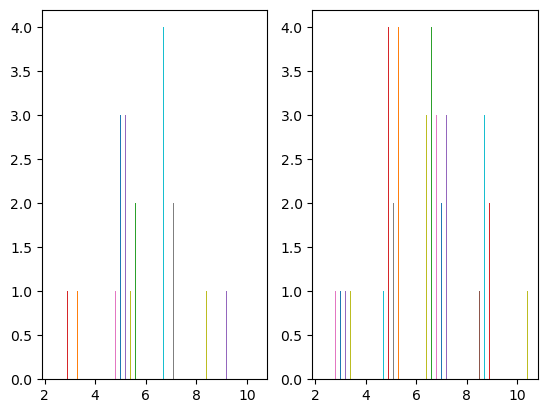

In [7]:
from matplotlib import pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)
pos = 0
width = 0.2
for  i in range(10):
    binary_adj = np.random.randint(0,2,(10,10))
    bank_network = nx.from_numpy_array(
                binary_adj,
                parallel_edges=False,
                create_using=nx.DiGraph,
            )  # first define a networkx object.
    ar_in_degree = np.array(bank_network.in_degree())[:,1]
    hist = np.unique(ar_in_degree, return_counts=True)
    ax1.bar(hist[0] + pos, hist[1], width=0.01)
    ax2.bar(hist[0] + pos, hist[1], width=0.01)
    pos = pos +width +0.1

